In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

In [12]:
from pykrige import variogram_models as vm
from scipy.optimize import minimize

In [3]:
semivariances = pd.read_pickle("variogram.pkl")

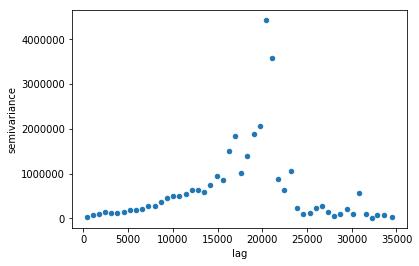

In [6]:
semivariances.plot('lag', 'semivariance', kind='scatter')

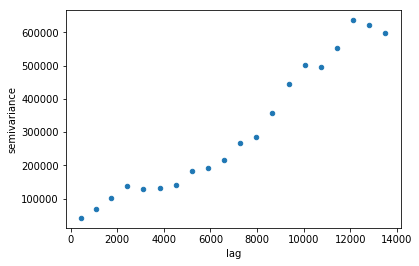

In [16]:
s2 = semivariances[semivariances["lag"] < 14000]
s2.plot('lag', 'semivariance', kind='scatter')

In [29]:
import numpy as np
def gen_min_func(df):
    def min_func(params):
        return np.sum((vm.gaussian_variogram_model(params, df["lag"]) - df["semivariance"])**2)
    return min_func

In [30]:
res = minimize(gen_min_func(s2), np.array([550000, 11000, 10000]))

In [31]:
res.x

array([1054651.70987061,   25877.68129748,   63350.93425533])

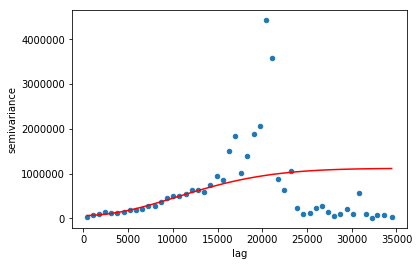

In [25]:
ax = semivariances.plot('lag', 'semivariance', kind='scatter')
ax.plot(semivariances['lag'], 
        vm.gaussian_variogram_model(res.x, semivariances['lag']),
        c='red')

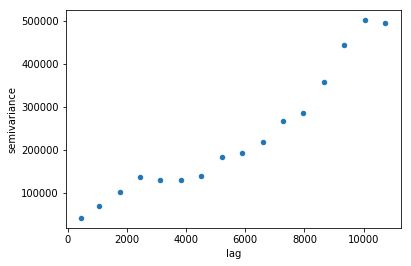

In [27]:
s3 = semivariances[semivariances["lag"] < 11000]
s3.plot('lag', 'semivariance', kind='scatter')

In [32]:
res = minimize(gen_min_func(s3), np.array([550000, 11000, 10000]))
res

      fun: 9252659499.450768
 hess_inv: array([[ 4.52695383e-04, -1.81078150e-04, -1.15388173e-03],
       [-1.81078150e-04,  7.24312589e-05,  4.61552684e-04],
       [-1.15388173e-03,  4.61552684e-04,  3.43711574e-02]])
      jac: array([   0., 1792.,    0.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 822
      nit: 28
     njev: 162
   status: 2
  success: False
        x: array([3296542.08694942,   49487.34710422,   69534.30521085])

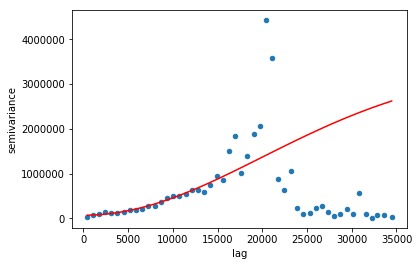

In [33]:
ax = semivariances.plot('lag', 'semivariance', kind='scatter')
ax.plot(semivariances['lag'], 
        vm.gaussian_variogram_model(res.x, semivariances['lag']),
        c='red')